# HR Employee Attrition

In [5]:
#importing libraries
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

Import datafile

In [6]:
#Read in data
train = pd.read_csv("train_EA_AV.csv", delimiter = ",")
test = pd.read_csv("test_EA_AV.csv", delimiter = ",")
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


There are multiple rows pertaining to each employee under the unique EmpID. Merging the rows under different quarters for each employee gives us a simplified table to work and build a prediction model.

In [7]:
aggregation_functions = {'Age':'last','Gender':'first','City':'first','Education_Level':'first','Salary':'last','Dateofjoining':'first','LastWorkingDate':'last','Joining Designation':'first','Designation':'last', 'Total Business Value': 'sum', 'Quarterly Rating': 'last'}
train_new = train.groupby(train['Emp_ID'],as_index=False).aggregate(aggregation_functions)
train_new.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,1715580,2
1,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
2,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,350000,1
3,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,120360,1
4,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,3,1265000,2


As attrition is a direct implication of there being an entry in the LastWorkingDate column, ones with no entry signifies employees still under service. Assigning '1' and '0' respectively for employees that quit and those still in books, this column can be taken as the target variable.

In [8]:
train_new.LastWorkingDate.fillna(0,inplace=True)
train_new["LastWorkingDate"]=train_new["LastWorkingDate"].apply(lambda x: 1 if x!=0 else 0)

Encoding the categorical variables 

In [10]:
label_encoder = LabelEncoder()
train_new['Gender'] = label_encoder.fit_transform(train_new['Gender'])
train_new['City'] = label_encoder.fit_transform(train_new['City'])
train_new['Education_Level'] = label_encoder.fit_transform(train_new['Education_Level'])

Creating new variables 

In [11]:
train_new['VFC'] = (train_new['Total Business Value'])/(train_new['Salary'])
train_new['Promotions'] = train_new['Designation']-train_new['Joining Designation']

Building Model

In [14]:
X = train_new.drop(['Dateofjoining','LastWorkingDate','Emp_ID','Joining Designation'],axis=1)
Y = train_new['LastWorkingDate']
#X1 = test1

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=3)

In [15]:
FC_DT = DecisionTreeClassifier(criterion="gini")
FC_DT.fit(X_train,Y_train)
predTree = FC_DT.predict(X_test)

print("DecisionTrees's Accuracy: ", metrics.f1_score(Y_test, predTree))

DecisionTrees's Accuracy:  0.7975460122699387


In [16]:
FC_RFC = RandomForestClassifier(criterion= 'entropy', max_depth= 20, max_features= 'sqrt', min_samples_leaf= 4,min_samples_split= 10,n_estimators= 800)
FC_RFC.fit(X_train,Y_train)
preds = FC_RFC.predict(X_test)
print("RandomForest's Accuracy: ", metrics.f1_score(Y_test, preds))

RandomForest's Accuracy:  0.8863636363636365


In [23]:
GBoost = GradientBoostingClassifier()
GBoost.fit(X_train,Y_train)
Predcsl = GBoost.predict(X_test)
print("GBM's Accuracy: ", metrics.f1_score(Y_test, Predcsl))

GBM's Accuracy:  0.8926553672316385


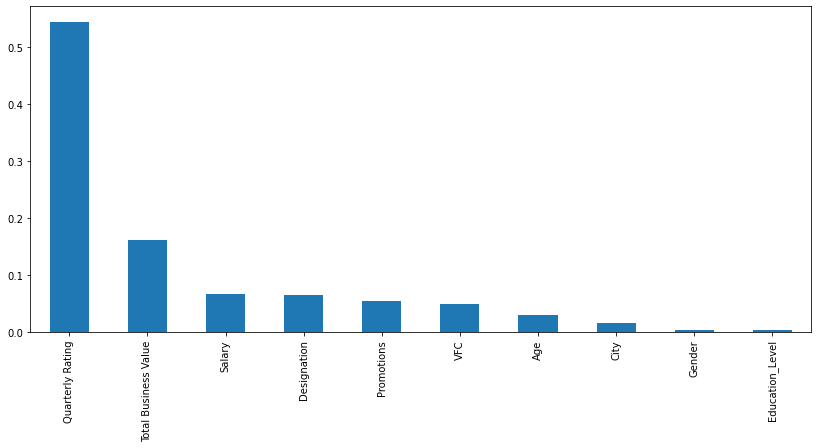

In [24]:
pd.Series(GBoost.feature_importances_, 
         index = X.columns).sort_values(ascending = False).plot(kind = 'bar', 
                                                                figsize = (14,6));

Preparing the dataset for Test file by merging the test file with the train fiel on basis of EmpID and extracting the features already present.

In [18]:
test_new = pd.merge(test, train_new, how="left", on="Emp_ID")

In [19]:
test_new.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,VFC,Promotions
0,394,34,0,12,2,97722,2011-06-06,0,2,4,27458220,3,280.982993,2
1,173,39,1,20,1,56174,2011-06-13,0,1,3,19866290,3,353.656318,2
2,1090,39,1,4,1,96750,2011-06-27,0,2,4,50382490,2,520.749251,2
3,840,40,0,27,1,88813,2011-07-11,0,1,4,17134040,2,192.922658,3
4,308,32,1,24,2,188418,2011-08-15,0,2,5,58024490,2,307.956193,3


In [21]:
X1 = test_new.drop(['Dateofjoining','LastWorkingDate','Emp_ID','Joining Designation'],axis=1)

In [25]:
Predcsl = GBoost.predict(X1)
submission = pd.DataFrame({'Emp_ID':test_new['Emp_ID'], 'Target':Predcsl})
filename = "predictionsGBWFE.csv"
submission.to_csv(filename, index = False)